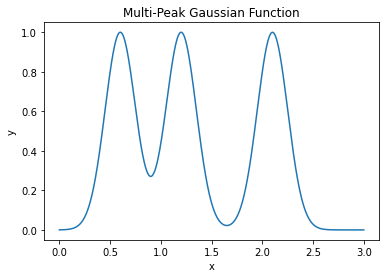

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def multi_gaussian(x, peaks, sigmas):
    result = 0
    for p, s in zip(peaks, sigmas):
        result += np.exp(-((x-p)**2)/(2*s**2))
    return result

peaks = [0.6, 1.2, 2.1]
sigmas = [0.15, 0.15, 0.15]

x = np.linspace(0, 
                3, 1000)
y = multi_gaussian(x, peaks, sigmas)

plt.plot(x, y)
plt.title('Multi-Peak Gaussian Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [2]:
import sys
sys.path.append('./../../')

import torch
from torch import nn
from user_fun.geom import line_linspace,generate_points_in_rectangle
from user_fun.pde import diff
from user_fun import bc

def WaveBenchMark():
    a = 3
    density = 32
    
    # Initial condition
    init_input = line_linspace([0,0],[1,0],density*2)
    init_output = np.zeros_like(init_input[:,[0]])

    left_input = line_linspace([0,0],[0,3],density*3)
    left_output = multi_gaussian(left_input[:,[1]], peaks, sigmas)

    # Simulation interval
    field_input = generate_points_in_rectangle([0,0],[1,3],density*density*3)
    field_output = np.zeros((field_input.shape[0],1))

    cp_list = [
        [field_input, field_output],
        [init_input, init_output],
        [left_input, left_output],
    ]

    loss_fn = nn.MSELoss()
    
    def wave_loss(model, data):
        input,output = data
        input.requires_grad=True
        
        # Data extraction
        t = input[:,[0]]
        x = input[:,[1]]
        use_input = torch.cat([x,t],dim = 1)
        U = model(use_input)
        u = U[:,[0]]

        # Compute first order derivatives
        dudx = diff(u, x)
        dudt = diff(u, t)

        # Loss computation
        loss = dudt + a * dudx
        loss = loss_fn(loss, output)
        return loss

    init_loss = bc.data_loss_factory(loss_fn)
    left_loss = bc.data_loss_factory(loss_fn)
    loss_list = [
        wave_loss, init_loss, left_loss
    ]

    return cp_list, loss_list

cp_list, loss_list = WaveBenchMark()



In [3]:
# 使用函数并设置参数
seg_density = 32
from user_fun.baseline.wave import WaveBenchMark
cp_list, loss_list = WaveBenchMark()

# 输出结果
print("Cloud point list:\n", cp_list)
print("Loss list:\n", loss_list)

from user_fun.visual import process_point_sets, visualize_point_sets_interactive

point_sets = {
    "pde": cp_list[0],
    "init": cp_list[1],
    "boundary": cp_list[2],
}

%matplotlib widget
results = process_point_sets(point_sets)
visualize_point_sets_interactive(results, xlim=[-0.2, 1.2], ylim=[-0.2, 3.2], zlim=[-1, 1])


Cloud point list:
 [[array([[0.710139  , 0.07785764],
       [0.95975691, 0.13296579],
       [0.40923642, 0.46135273],
       ...,
       [0.06938096, 1.96516461],
       [0.35991037, 1.60204106],
       [0.09772587, 1.95714853]]), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])], [array([[0.        , 0.        ],
       [0.        , 0.04761905],
       [0.        , 0.0952381 ],
       [0.        , 0.14285714],
       [0.        , 0.19047619],
       [0.        , 0.23809524],
       [0.        , 0.28571429],
       [0.        , 0.33333333],
       [0.        , 0.38095238],
       [0.        , 0.42857143],
       [0.        , 0.47619048],
       [0.        , 0.52380952],
       [0.        , 0.57142857],
       [0.        , 0.61904762],
       [0.        , 0.66666667],
       [0.        , 0.71428571],
       [0.        , 0.76190476],
       [0.        , 0.80952381],
       [0.        , 0.85714286],
       [0.        , 0.9047619 ],
       [0.   

Output()

In [4]:
print(cp_list[0][0].shape)
print(cp_list[0][1].shape)
print(cp_list[1][0].shape)
print(cp_list[1][1].shape)
print(cp_list[2][0].shape)
print(cp_list[2][1].shape)

(3072, 2)
(3072, 1)
(64, 2)
(64, 1)
(96, 2)
(96, 1)
